In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic') # 패키지에 타이타닉 데이터를 로드할 수 있게 만든 함수
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.shape

(891, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# deck은 전체 데이터의 결측치 비율이 77%로 제거하고 분석하는 것이 좋아보인다.
df.isna().sum() / len(df)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_24500\3224057336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'fare', hue = 'survived', shade = True)
C:\Users\user\data_analysis\camp\python_course\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\data_analysis\camp\python_course\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\data_analysis\camp\python_course\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\data_an

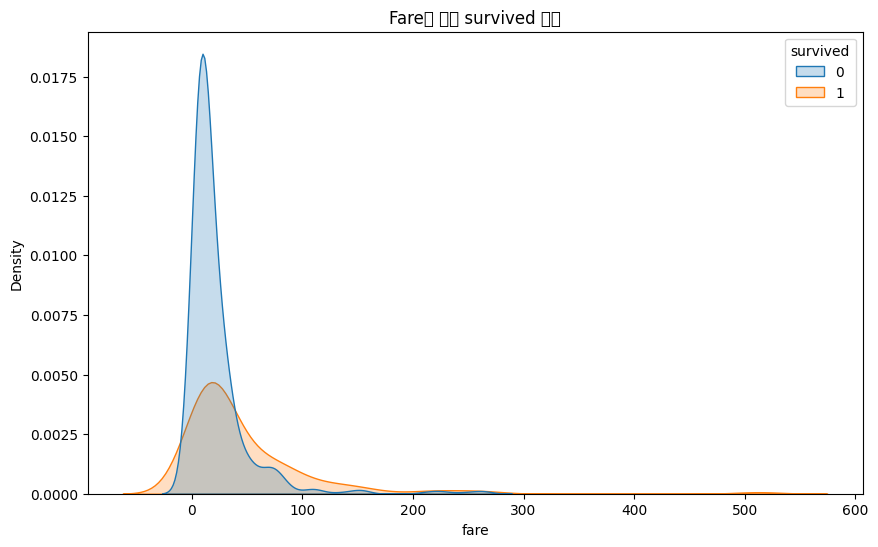

In [3]:
# 문길래 튜터님 과제 3에 대해서, 데이터가 적어서 기존 결과와 크게 다르기에 다시 작업
# 이 예시는 plot에 한글이 들어갔을 경우, 명확하게 표시가 안 되는 부분을 보여주기 위한 예시 코드

plt.figure(figsize = (10,6))

# kdeplot
sns.kdeplot(data = df, x = 'fare', hue = 'survived', shade = True)
plt.title('Fare에 대한 survived 분포')
plt.show()

한글 폰트 설정 완료


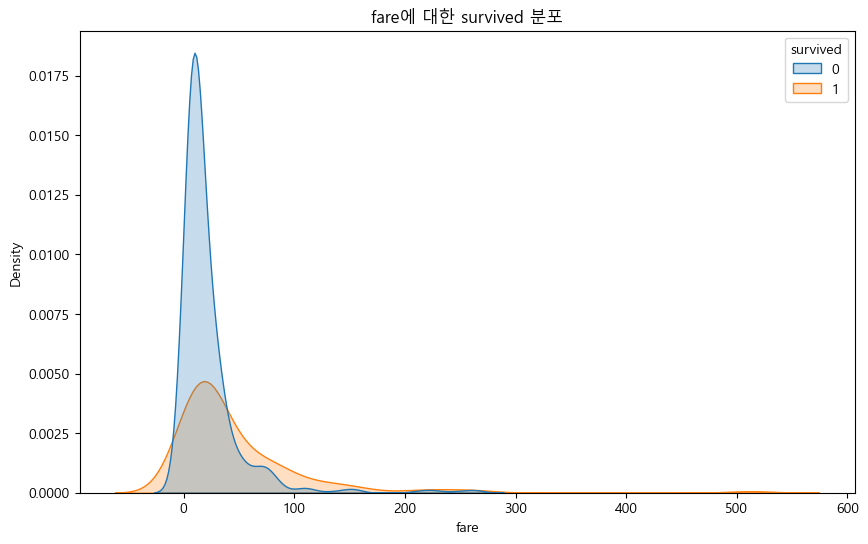

In [4]:
# 1. 경고문구도 길었으므로, 제거하는 방법
import warnings
warnings.filterwarnings('ignore')

# 2. utils에서 설정한 한글 깨짐 방지 함수
import utils
utils.set_korean_font()

# 3. utils에서 설정한 kdeplot 함수로 plot 생성
utils.draw_kdeplot(df, 'fare', 'survived')

In [5]:
# 1. Fare를 4개 구간으로 나누기 (같은 인원수로 나누기)
df['fare_group'] = pd.cut(df['fare'], bins = [0,45,80,160,np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# 2. 구간별 생존율 평균 계산
fare_survival = df.groupby('fare_group', observed=True)['survived'].mean()

print(fare_survival)

fare_group
Low          0.326241
Medium       0.556701
High         0.788462
Very High    0.727273
Name: survived, dtype: float64


In [ ]:
# 모듈에 결측치 대체 함수 불러와서 대체(물론, 이 함수는 안 쓸겁니다. 여러분의 코딩 실력 향상을 위해... 나중에 지울거에요. 오늘은 그냥 예시)
# utils 모듈의 함수는 제가 좀 더 고민해보고, 진짜 필요한 부분만 쓸거에요(plot 한글 깨짐 방지 등)
df.drop(columns = 'deck', inplace = True)
df_filled = utils.automate_impute(df)
df_filled.isna().sum()

  - [숫자형] age: 중앙값(28.0)으로 대체 완료
  - [범주형] embarked: 최빈값('S')으로 대체 완료
  - [범주형] embark_town: 최빈값('Southampton')으로 대체 완료
  - [범주형] fare_group: 최빈값('Low')으로 대체 완료


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
fare_group     0
dtype: int64